In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import modulos__ProyectoFinal as modulos

In [41]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


### 4. Ingenieria de Caracteristicas

#### 4.1 Configuración de Variables:

In [42]:
# Eliminamos las variables q'timestamp', 'cityid', 'dmaid', 'rowNumber', 'otherdetails'ue no nos aportan:
df = df.drop(columns = [], errors='ignore')

In [43]:
#obtenemos tipos de datos de columnas de dataframe

categoric_vars, discrete_vars , continues_vars = modulos.getColumnsDataTypes(df=df)

In [56]:
y = 'gender'
categoric_vars.remove(y)


### 4.2 Imputación de Variables

##### 4.2.1 Variables Continuas

In [44]:
df[continues_vars].isnull().mean()

totalyearlycompensation    0.0
yearsofexperience          0.0
yearsatcompany             0.0
basesalary                 0.0
stockgrantvalue            0.0
bonus                      0.0
dtype: float64

##### 4.2.2 Variables Discretas

In [45]:
df[discrete_vars].isnull().mean()

Masters_Degree      0.0
Bachelors_Degree    0.0
Doctorate_Degree    0.0
Highschool          0.0
Some_College        0.0
Race_Asian          0.0
Race_White          0.0
Race_Two_Or_More    0.0
Race_Black          0.0
Race_Hispanic       0.0
dtype: float64

##### 4.2.3 Variables Categoricas

In [46]:
#Aca si encontramos variables con datos nulos

df[categoric_vars].isnull().mean()

company      0.000080
level        0.001900
title        0.000000
location     0.000000
tag          0.013633
gender       0.311931
Race         0.641981
Education    0.515182
dtype: float64

In [47]:
# Verificamos cuantos valores tenemos nulos

df[categoric_vars].isnull().sum()

company          5
level          119
title            0
location         0
tag            854
gender       19540
Race         40215
Education    32272
dtype: int64

In [48]:
# Eliminamos las filas en las columnas con datos nulos de "Company", "level" y "tag" debido a que son muy pocos datos respecto al volumen de información y no nos afecta

df = df.dropna(subset = ['level', 'tag', 'company'])
df[categoric_vars].isnull().sum()


company          0
level            0
title            0
location         0
tag              0
gender       18985
Race         39314
Education    31390
dtype: int64

In [49]:
#Con Race, gender y Education:

#Gender, hacemos el cambio para un dato que aparecia como "Senior Software Engineer"

df.loc[ df.gender == 'Title: Senior Software Engineer', 'gender'] = 'Unavailable'
df.gender = df.gender.fillna('Unavailable')

<AxesSubplot:xlabel='gender', ylabel='basesalary'>

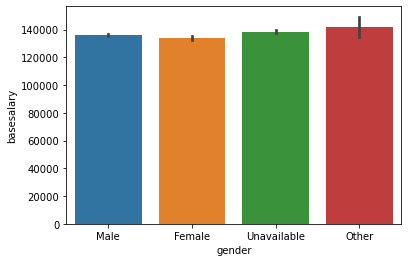

In [50]:
sns.barplot(x = df.gender, y = df.basesalary)

<AxesSubplot:xlabel='Race', ylabel='basesalary'>

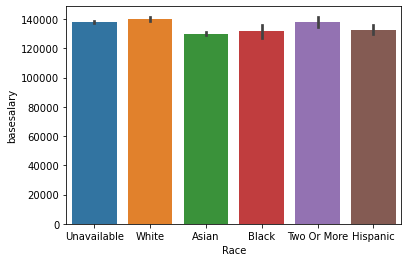

In [51]:
#Hacemos lo mismo para Race

df.Race.value_counts(dropna=False)
df.Race = df.Race.fillna('Unavailable')

sns.barplot(x = df.Race, y = df.basesalary)

<AxesSubplot:xlabel='Race', ylabel='basesalary'>

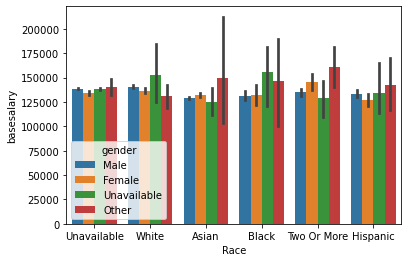

In [52]:
sns.barplot(x = 'Race', hue =  'gender', y = 'basesalary', data = df)

<AxesSubplot:xlabel='Education', ylabel='basesalary'>

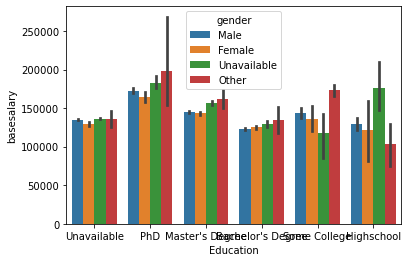

In [53]:
#Ahora lo hacemos con Education

df.Education.value_counts(dropna=False)
df.Education = df.Education.fillna('Unavailable')

sns.barplot(x = 'Education', hue =  'gender', y = 'basesalary', data = df)

### 2.3) Codificación de Variables Categóricas

In [55]:
# Variables categoricas:

categoric_vars

['company', 'level', 'title', 'location', 'tag', 'gender', 'Race', 'Education']

In [57]:
company_map = df['company'].value_counts().to_dict()
company_map

{'Amazon': 7948,
 'Microsoft': 5079,
 'Google': 4246,
 'Facebook': 2938,
 'Apple': 1984,
 'Oracle': 1114,
 'Salesforce': 1041,
 'Intel': 936,
 'IBM': 903,
 'Cisco': 895,
 'Uber': 863,
 'Capital One': 773,
 'LinkedIn': 682,
 'VMware': 652,
 'Qualcomm': 559,
 'JPMorgan Chase': 541,
 'Bloomberg': 535,
 'Goldman Sachs': 468,
 'Intuit': 442,
 'PayPal': 424,
 'Deloitte': 401,
 'Twitter': 388,
 'Adobe': 380,
 'Walmart Labs': 377,
 'Nvidia': 354,
 'Accenture': 352,
 'Expedia': 347,
 'Wayfair': 338,
 'eBay': 329,
 'SAP': 328,
 'Lyft': 323,
 'Workday': 257,
 'Netflix': 257,
 'Dropbox': 249,
 'Shopify': 233,
 'Dell Technologies': 224,
 'Airbnb': 219,
 'Atlassian': 219,
 'Visa': 213,
 'Snap': 196,
 'Yelp': 192,
 'ServiceNow': 182,
 'Yahoo': 181,
 'Tesla': 175,
 'Square': 173,
 'Stripe': 173,
 'Indeed': 169,
 'Yandex': 166,
 'ByteDance': 163,
 'Zillow': 158,
 'Splunk': 157,
 'Comcast': 148,
 'Broadcom': 142,
 'T-Mobile': 139,
 'Spotify': 138,
 'Nutanix': 136,
 'General Motors': 134,
 'Autodesk': 13

In [58]:
df['company'] = df['company'].map(company_map)
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
409,181,IC2,Software Engineer,160500,"Sunnyvale, CA",0.58,0.58,Full Stack,128000.0,13000.0,...,0,0,0,0,0,0,0,0,Unavailable,Unavailable
410,1114,M3,Software Engineering Manager,340000,"Redwood City, CA",16.00,15.00,Distributed Systems (Back-End),206000.0,134000.0,...,0,0,0,0,0,0,0,0,Unavailable,Unavailable
411,559,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15.00,6.00,Embedded Systems,0.0,0.0,...,0,0,0,0,0,0,0,0,Unavailable,Unavailable
412,157,P2,Software Engineer,160000,"Seattle, WA",5.00,3.00,Full Stack,0.0,0.0,...,0,0,0,0,0,0,0,0,Unavailable,Unavailable
413,4246,L3,Software Engineer,208000,"Mountain View, CA",0.00,0.00,Distributed Systems (Back-End),116000.0,65000.0,...,0,0,0,0,0,0,0,0,Unavailable,Unavailable


In [91]:
df = df.join(pd.get_dummies(df[['gender', 'Education']], drop_first=True ) )

In [84]:
from sklearn.pipeline import Pipeline
import preprocessors__ProyectoFinal as pp

def instanciatePipeline(df, y):
    categoric_vars, discrete_vars , continues_vars = modulos.getColumnsDataTypes(df=df)
    
    categoric_vars.remove(y)
    bankChurner_Pipeline = Pipeline(steps=[
        ('categorical-encoder',
            pp.categoricalEncoderOperator(varNames=categoric_vars)),

        ('classifier',
            RandomForestClassifier(n_estimators=20, max_depth=100))
    ])

    return bankChurner_Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

X = df.drop(['gender'], axis=1)
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2022)

dfSalida = instanciatePipeline(df, 'gender').fit_transform(X_train, y_train)

dfSalida['gender'] = pd.get_dummies(y, drop_first=True)


In [ ]:
dfSalida.to_csv("FE_DF_Salida.csv")